In [1]:
import os, geopandas as gpd

In [2]:
cities=gpd.read_file(os.path.join("map","Mexico_Cities","Mexico_Cities.shp"))

In [3]:
# que tipo es cities? 
type(cities)

geopandas.geodataframe.GeoDataFrame

In [4]:
# dimensiones de cities  
cities.shape

(36, 4)

In [5]:
# nombres de columnas en cities 
cities.columns

Index(['NAME', 'CAPITAL', 'STATE_NAME', 'geometry'], dtype='object')

In [6]:
# contenido 
cities.head()

,NAME,CAPITAL,STATE_NAME,geometry
0,Monterrey,Y,Nuevo Leon,POINT (-100.31709 25.67735)
1,Mazatlan,N,Sinaloa,POINT (-106.41607 23.20383)
2,Guadalajara,Y,Jalisco,POINT (-103.34380 20.67359)
3,Tampico,N,Tamaulipas,POINT (-97.84263 22.24323)
4,Mexico City,C,Distrito Federal,POINT (-99.12757 19.42705)


In [7]:
cities[cities.isna().any(axis=1)]

,NAME,CAPITAL,STATE_NAME,geometry


In [8]:
# types / columns 
cities.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   NAME        36 non-null     object  
 1   CAPITAL     36 non-null     object  
 2   STATE_NAME  36 non-null     object  
 3   geometry    36 non-null     geometry
dtypes: geometry(1), object(3)
memory usage: 1.2+ KB


<AxesSubplot:>

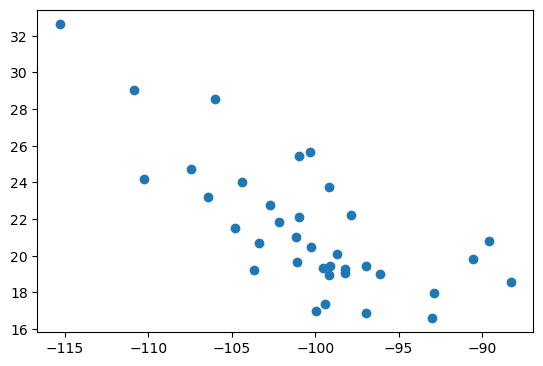

In [9]:
cities.plot()

In [10]:
lakes=gpd.read_file(os.path.join("map","Mexico_Lakes","Mexico_Lakes.shp"))

In [11]:
roads=gpd.read_file(os.path.join("map","Mexico_Roads","Mexico_Roads.shp"))

<AxesSubplot:>

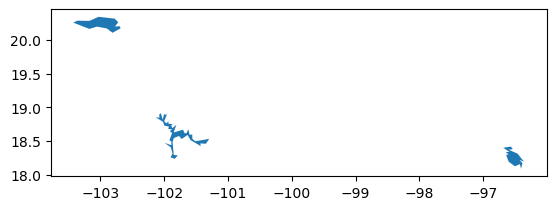

In [12]:
# mostrando lakes
lakes.plot()

<AxesSubplot:>

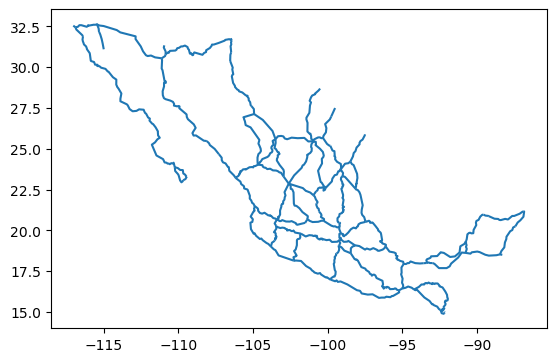

In [13]:
# mostrando roads
roads.plot()

In [14]:
# ajustes visuales 

<AxesSubplot:>

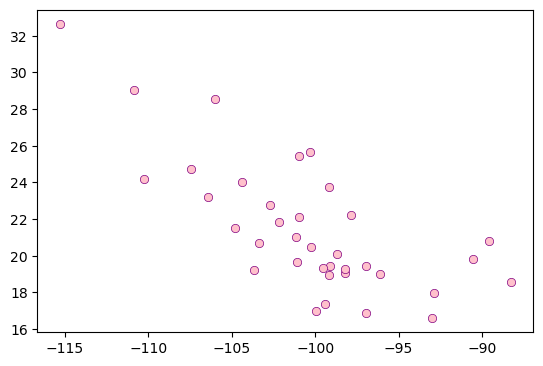

In [15]:
cities.plot(facecolor="pink",edgecolor='purple',linewidth=0.5) 

In [16]:
# No se nota claramente, entonces decido cambiar la data de cities por la de states para mejor visualización 

In [17]:
states=gpd.read_file(os.path.join("map","Mexico_States","Mexico_States.shp"))

<AxesSubplot:>

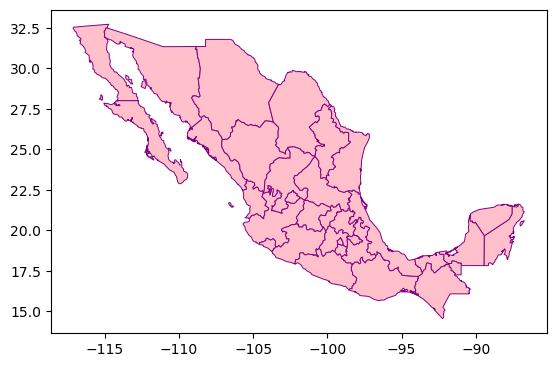

In [18]:
states.plot(facecolor="pink",edgecolor='purple', linewidth=0.7) 

<AxesSubplot:>

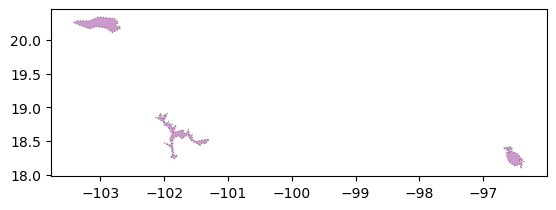

In [19]:
lakes.plot(facecolor="purple", alpha=0.4, edgecolor='black', linewidth=0.8,linestyle='dotted')

<AxesSubplot:>

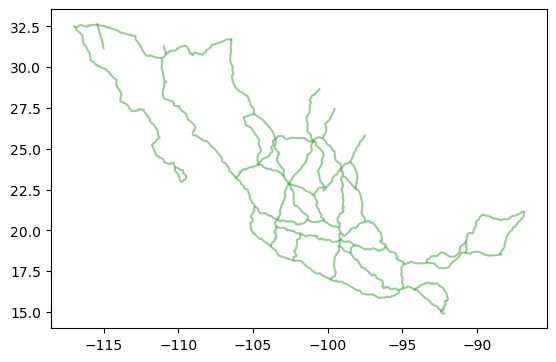

In [20]:
roads.plot(marker='.', color='green', markersize=1, alpha=0.4)

In [21]:
# capas multiples de mapas

In [22]:
states.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [23]:
lakes.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [24]:
roads.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [25]:
# cambio crs en lakes y roads para que sean iguales al de states

lakes=lakes.to_crs(states.crs)
roads=roads.to_crs(states.crs)

<AxesSubplot:>

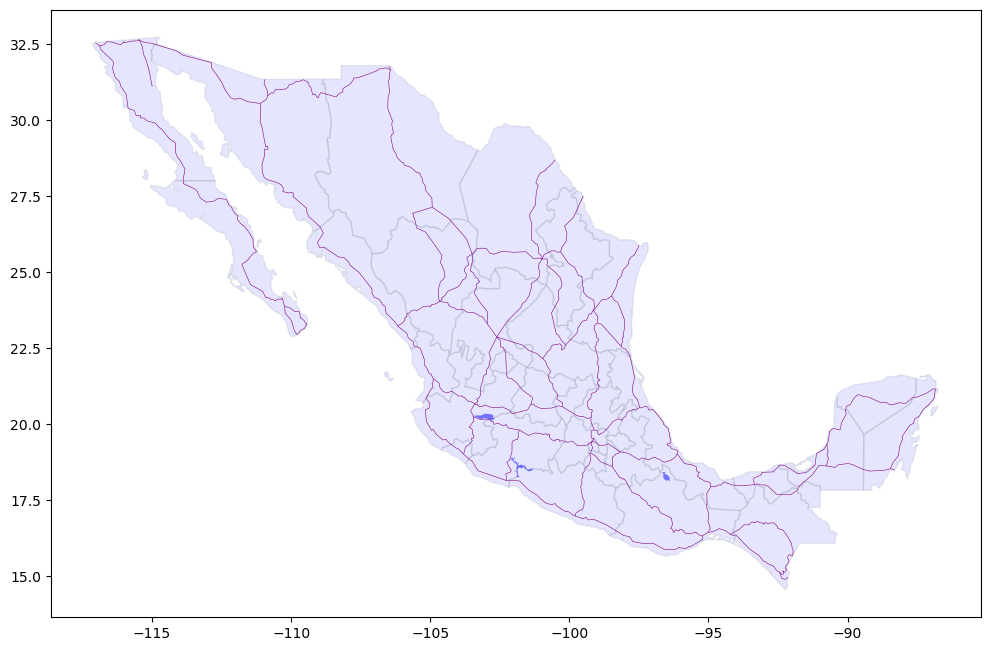

In [33]:
# ahora pongo capa por capa 
base = states.plot(facecolor="blue", alpha=0.1, edgecolor='darkslategrey', linewidth=1,figsize=(12,12))
lakes.plot(marker='.', color='blue', markersize=1,alpha=0.5,ax=base) 
roads.plot(edgecolor='purple', linewidth=0.4,ax=base)

In [34]:
import folium

m = lakes.explore(color="red", name="lakes")

m = roads.explore(m=m, color="blue",name="roads")
#folium.LayerControl().add_to(m) #optional
m

In [35]:
# alguna información # para elegir que estado analizar 
states.head()

,CODE,NAME,geometry
0,MX02,Baja California,"MULTIPOLYGON (((-113.13972 29.01778, -113.2405..."
1,MX03,Baja California Sur,"MULTIPOLYGON (((-111.20612 25.80278, -111.2302..."
2,MX18,Nayarit,"MULTIPOLYGON (((-106.62108 21.56531, -106.6475..."
3,MX14,Jalisco,"POLYGON ((-101.52490 21.85664, -101.58830 21.7..."
4,MX01,Aguascalientes,"POLYGON ((-101.84620 22.01176, -101.96530 21.8..."


In [38]:
# ahora me enfoco en un estado 
Baja_California=states[states.NAME=='Baja California']

In [39]:
# recorto lo que no necesito 
lakes_clipped = gpd.clip(gdf=lakes,mask=Baja_California)
roads_clipped = gpd.clip(gdf=roads,mask=Baja_California)

/Users/valeriaminano/opt/anaconda3/lib/python3.9/site-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


<AxesSubplot:>

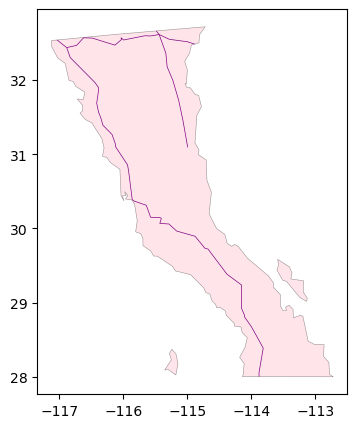

In [40]:
base = Baja_California.plot(facecolor="pink", alpha=0.4, edgecolor='black', linewidth=0.4,figsize=(5,5))
lakes_clipped.plot(marker='+', color='blue', markersize=15,ax=base)
roads_clipped.plot(edgecolor='purple', linewidth=0.5,ax=base)

In [41]:
Baja_California_coord=[16.43333,-93.79528]

In [42]:
m = lakes.explore(location=Baja_California_coord,
                   zoom_start=4.5,
                   tiles='CartoDB positron',
                   color='red',
                   name="lakes")
m = roads.explore(m=m, color="blue",
                   name="roads")
# folium.LayerControl().add_to(m) 
m

In [43]:
# exportando mapas 

/Users/valeriaminano/opt/anaconda3/lib/python3.9/site-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


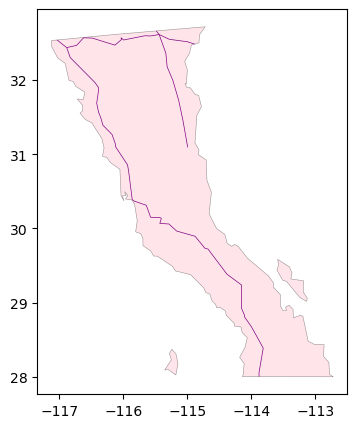

In [47]:
# guardo el mapa como imagen 
import matplotlib.pyplot as plt

base = Baja_California.plot(facecolor="pink", alpha=0.4, edgecolor='black', linewidth=0.4,figsize=(5,5))
map2 = lakes_clipped.plot(marker='+', color='blue', markersize=15,ax=base)
mapEnd = roads_clipped.plot(edgecolor='purple', linewidth=0.5,ax=base)
plt.savefig(os.path.join("map",'mapEnd.jpg'))

In [48]:
#exportamos los datos
states.to_file(os.path.join("map","MAPAS_FINALES.gpkg"), layer='states', driver="GPKG")
lakes.to_file(os.path.join("map","MAPAS_FINALES.gpkg"), layer='lakes', driver="GPKG")
roads.to_file(os.path.join("map","MAPAS_FINALES.gpkg"), layer='lakes', driver="GPKG")

In [49]:
mapaMex='https://github.com/vaaleriaa111/geodataPais_Provincia/raw/main/map/MAPAS_FINALES.gpkg'

In [50]:
from  fiona import listlayers

listlayers(mapaMex)

DriverError: HTTP response code: 404